In [30]:
## first graph
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
## second graph
from matplotlib import pyplot
from numpy.random import rand
from pylab import figure

## tree graph
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

##
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection



import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import proj3d

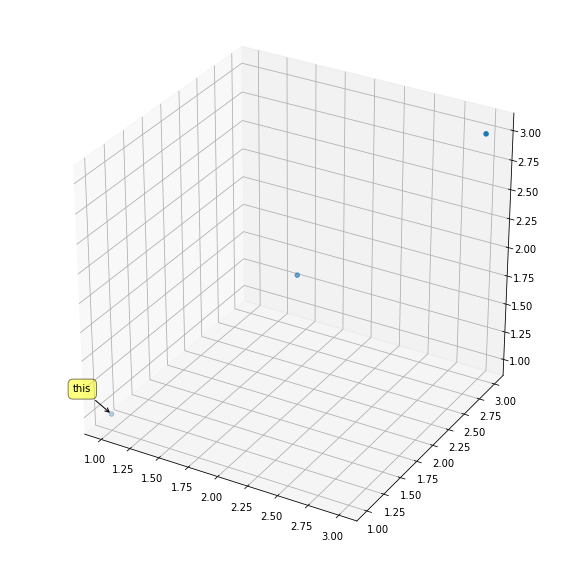

In [3]:
#size graph
fig = pylab.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
x = y = z = [1, 2, 3]
sc = ax.scatter(x,y,z)
# now try to get the display coordinates of the first point

x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())

label = pylab.annotate(
    "this", 
    xy = (x2, y2), xytext = (-20, 20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

def update_position(e):
    x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())
    label.xy = x2,y2
    label.update_positions(fig.canvas.renderer)
    fig.canvas.draw()
fig.canvas.mpl_connect('button_release_event', update_position)
pylab.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

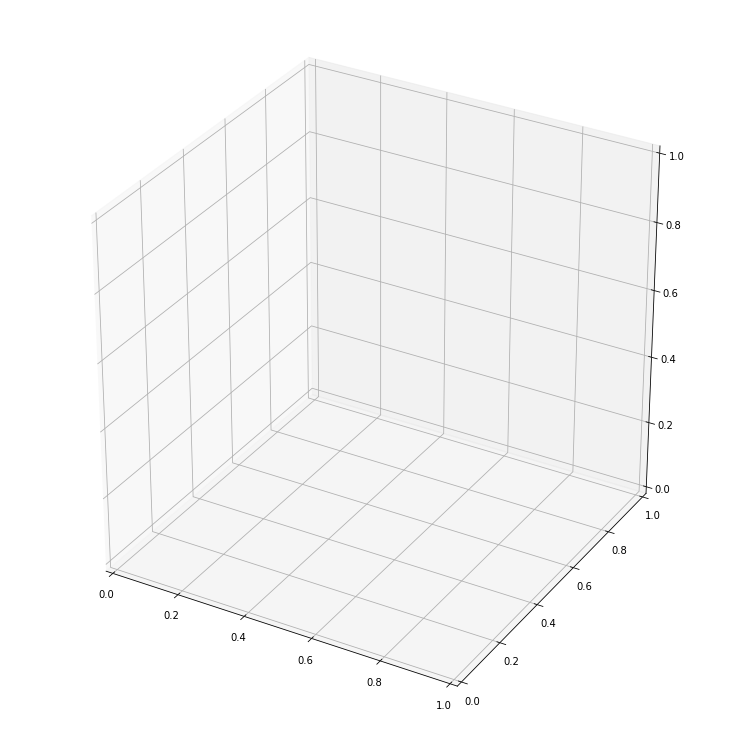

In [45]:
m=rand(3,3) # m is an array of (x,y,z) coordinate triplets

fig = figure(figsize=(10,10))
ax = Axes3D(fig)


for i in range(len(m)): #plot each point + it's index as text above
 ax.scatter(m[i,'a'],m[i,1],m[i,2],color='b') 
 ax.text(m[i,'a'],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
 color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()

In [24]:
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)
    def annotate3D(ax, s, *args, **kwargs):
            '''add anotation text s to to Axes3d ax'''
            tag = Annotation3D(s, *args, **kwargs)
            ax.add_artist(tag)

NameError: name 'annotate3D' is not defined

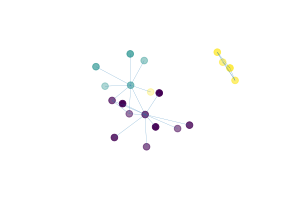

In [38]:
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# data: coordinates of nodes and links
xn = [1.1, 1.9, 0.1, 0.3, 1.6, 0.8, 2.3, 1.2, 1.7, 1.0, -0.7, 0.1, 0.1, -0.9, 0.1, -0.1, 2.1, 2.7, 2.6, 2.0]
yn = [-1.2, -2.0, -1.2, -0.7, -0.4, -2.2, -1.0, -1.3, -1.5, -2.1, -0.7, -0.3, 0.7, -0.0, -0.3, 0.7, 0.7, 0.3, 0.8, 1.2]
zn = [-1.6, -1.5, -1.3, -2.0, -2.4, -2.1, -1.8, -2.8, -0.5, -0.8, -0.4, -1.1, -1.8, -1.5, 0.1, -0.6, 0.2, -0.1, -0.8, -0.4]
group = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3]
edges = [(1, 0), (2, 0), (3, 0), (3, 2), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (11, 10), (11, 3), (11, 2), (11, 0), (12, 11), (13, 11), (14, 11), (15, 11), (17, 16), (18, 16), (18, 17), (19, 16), (19, 17), (19, 18)]
xyzn = list(zip(xn, yn, zn))
segments = [(xyzn[s], xyzn[t]) for s, t in edges]                

# create figure        
fig = plt.figure(dpi=60)
ax = fig.gca(projection='3d')
ax.set_axis_off()

# plot vertices
ax.scatter(xn,yn,zn, marker='o', c = group, s = 64)    
# plot edges
edge_col = Line3DCollection(segments, lw=0.2)
ax.add_collection3d(edge_col)
# add vertices annotation.
for j, xyz_ in enumerate(xyzn): 
    annotate3D(ax, s=str(j), xyz=xyz_, fontsize=10, xytext=(-3,3),
               textcoords='offset points', ha='right',va='bottom')    
plt.show()

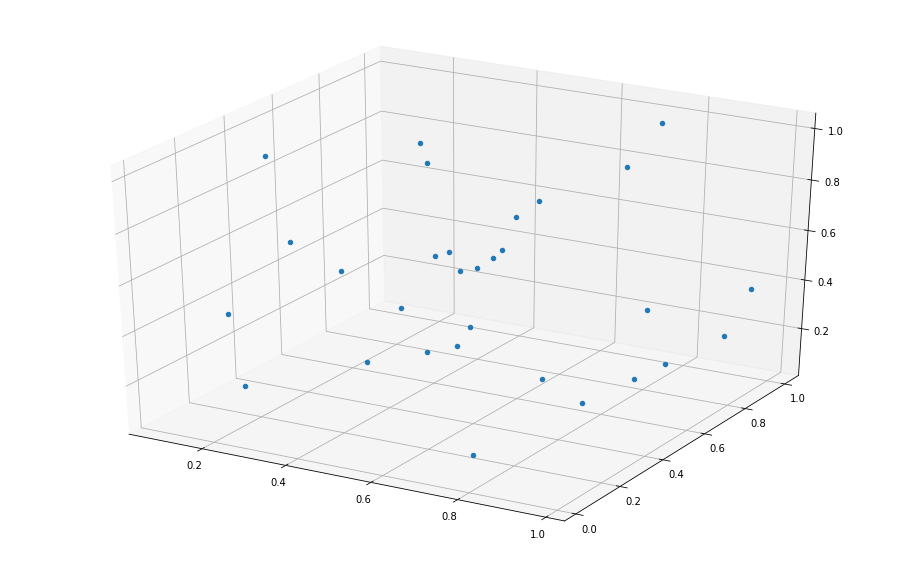

In [39]:
def visualize3DData (X):
    """Visualize data in 3d plot with popover next to mouse position.

    Args:
        X (np.array) - array of points, of shape (numPoints, 3)
    Returns:
        None
    """
    fig = plt.figure(figsize = (16,10))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], depthshade = False, picker = True)


    def distance(point, event):
        """Return distance between mouse position and given data point

        Args:
            point (np.array): np.array of shape (3,), with x,y,z in data coords
            event (MouseEvent): mouse event (which contains mouse position in .x and .xdata)
        Returns:
            distance (np.float64): distance (in screen coords) between mouse pos and data point
        """
        assert point.shape == (3,), "distance: point.shape is wrong: %s, must be (3,)" % point.shape

        # Project 3d data space to 2d data space
        x2, y2, _ = proj3d.proj_transform(point[0], point[1], point[2], plt.gca().get_proj())
        # Convert 2d data space to 2d screen space
        x3, y3 = ax.transData.transform((x2, y2))

        return np.sqrt ((x3 - event.x)**2 + (y3 - event.y)**2)


    def calcClosestDatapoint(X, event):
        """"Calculate which data point is closest to the mouse position.

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            event (MouseEvent) - mouse event (containing mouse position)
        Returns:
            smallestIndex (int) - the index (into the array of points X) of the element closest to the mouse position
        """
        distances = [distance (X[i, 0:3], event) for i in range(X.shape[0])]
        return np.argmin(distances)


    def annotatePlot(X, index):
        """Create popover label in 3d chart

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            index (int) - index (into points array X) of item which should be printed
        Returns:
            None
        """
        # If we have previously displayed another label, remove it first
        if hasattr(annotatePlot, 'label'):
            annotatePlot.label.remove()
        # Get data point from array of points X, at position index
        x2, y2, _ = proj3d.proj_transform(X[index, 0], X[index, 1], X[index, 2], ax.get_proj())
        annotatePlot.label = plt.annotate( "Value %d" % index,
            xy = (x2, y2), xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        fig.canvas.draw()


    def onMouseMotion(event):
        """Event that is triggered when mouse is moved. Shows text annotation over data point closest to mouse."""
        closestIndex = calcClosestDatapoint(X, event)
        annotatePlot (X, closestIndex)

    fig.canvas.mpl_connect('motion_notify_event', onMouseMotion)  # on mouse motion
    plt.show()


if __name__ == '__main__':
    X = np.random.random((30,3))
    visualize3DData (X)



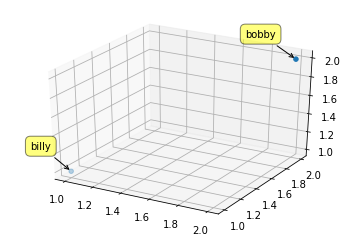

In [40]:
points = np.array([(1,1,1), (2,2,2)])
labels = ['billy', 'bobby']

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xs, ys, zs = np.split(points, 3, axis=1)
sc = ax.scatter(xs,ys,zs)

# if this code is placed inside a function, then
# we must use a predefined global variable so that
# the update function has access to it. I'm not
# sure why update_positions() doesn't get access
# to its enclosing scope in this case.
global labels_and_points
labels_and_points = []

for txt, x, y, z in zip(labels, xs, ys, zs):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    label = plt.annotate(
        txt, xy = (x2, y2), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    labels_and_points.append((label, x, y, z))


def update_position(e):
    for label, x, y, z in labels_and_points:
        x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
        label.xy = x2,y2
        label.update_positions(fig.canvas.renderer)
    fig.canvas.draw()

fig.canvas.mpl_connect('motion_notify_event', update_position)

plt.show()

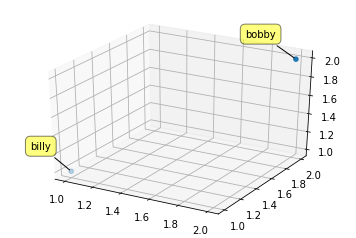

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
points = np.array([(1,1,1), (2,2,2)])
labels = ['billy', 'bobby']
plotlabels = []
xs, ys, zs = np.split(points, 3, axis=1)
sc = ax.scatter(xs,ys,zs)

for txt, x, y, z in zip(labels, xs, ys, zs):
    x2, y2, _ = proj3d.proj_transform(x,y,z, ax.get_proj())
    label = plt.annotate(
        txt, xy = (x2, y2), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))
    plotlabels.append(label)
fig.canvas.mpl_connect('motion_notify_event', lambda event: update_position(event,fig,ax,zip(plotlabels, xs, ys, zs)))
plt.show()


def update_position(e,fig,ax,labels_and_points):
    for label, x, y, z in labels_and_points:
        x2, y2, _ = proj3d.proj_transform(x, y, z, ax.get_proj())
        label.xy = x2,y2
        label.update_positions(fig.canvas.renderer)
    fig.canvas.draw()


In [43]:
#! /usr/bin/env python3

"""
Programm to visualize geographical data collected from http://srtm.csi.cgiar.org/
Current example: srtm_05_08.xyz -> Hawaii islands
"""

# import matplotlib and numpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.mlab import griddata
from matplotlib import cm

# data extraction
file = open('/path/srtm_05_08/srtm_05_08.xyz')
data = open('/path/srtm_05_08/hawaii.txt', 'w')

for line in file:
    Ligne = file.readline()
    Ligne = Ligne.split()
    
    if len(Ligne)==3:
        x = float(Ligne[0])
        y = float(Ligne[1])
        z = float(Ligne[2])
        
        # select the data corresponding to some region
        latitude = 20.896
        longitude = -156.585
        eps = 0.1
        
        if abs(x-longitude)<eps and abs(y-latitude)<eps:
            data.write(str(x)+' '+str(y)+' '+str(z)+'\n')
            
file.close()
data.close()
print('Read data: OK')

# read data file
data = np.genfromtxt('/path/srtm_05_08/hawaii.txt')
print('Extract data: OK')

x = data[1:,0]
y = data[1:,1]
z = data[1:,2]

# correction
for i in range(len(z)):
    if z[i]<=0:z[i]=0

# grid generation
xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)

# figure
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklines(), visible=False)
plt.setp(ax.get_xgridlines(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_yticklines(),visible=False)
plt.setp(ax.get_zticklabels(), visible=False)
plt.setp(ax.get_zticklines(),visible=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(False)
cb = cm.terrain
Z = griddata(x, y, z, xi, yi, interp='linear')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cb, vmin=0, vmax=max(z), linewidth=0.1, antialiased=True)
ax.set_zlim(0, 2*max(z))
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/path/srtm_05_08/srtm_05_08.xyz'

In [ ]:
#https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot